In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AEP_hourly.csv', index_col = 'Datetime', parse_dates = True)

<Axes: xlabel='Datetime'>

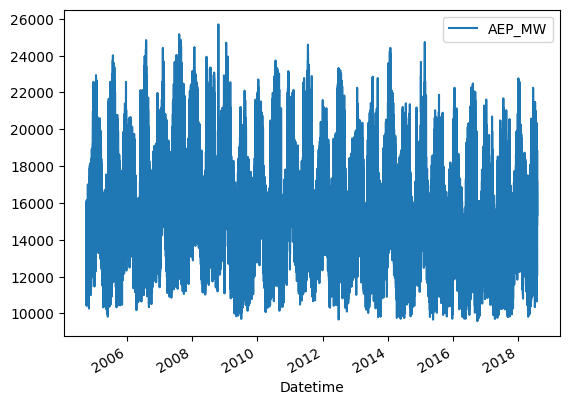

In [ ]:
data.plot()

In [ ]:
data.shape

(121273, 1)

In [ ]:
train = data.iloc[:100000]
test = data.iloc[100000:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
n_inputs = 100
n_features = 1

In [ ]:
generator = TimeseriesGenerator(scaled_train, scaled_train, n_inputs, batch_size = 1)

In [ ]:
nx, ny = generator[0]

In [ ]:
nx.flatten()

array([0.23800911, 0.19977546, 0.18181251, 0.17807023, 0.18761305,
       0.21056571, 0.25135658, 0.28909125, 0.31541196, 0.3292584 ,
       0.34441464, 0.33349966, 0.32096301, 0.30312481, 0.29233456,
       0.27724069, 0.29613921, 0.34379093, 0.34921724, 0.31884239,
       0.29320776, 0.27337367, 0.23800911, 0.20145949, 0.27661698,
       0.24979729, 0.23632508, 0.23183434, 0.2397555 , 0.27811389,
       0.33705482, 0.38102663, 0.39824113, 0.41059066, 0.41882368,
       0.40391692, 0.38819934, 0.36431111, 0.34578681, 0.33599451,
       0.3429801 , 0.40061124, 0.42699432, 0.41439531, 0.40921849,
       0.39100605, 0.34584919, 0.29027631, 0.34684713, 0.31616042,
       0.30193975, 0.29751138, 0.30368615, 0.33836462, 0.39643236,
       0.45568515, 0.46697437, 0.47395996, 0.46978108, 0.45836712,
       0.44202582, 0.42936444, 0.42044533, 0.40535146, 0.41901079,
       0.47826358, 0.5037111 , 0.48687083, 0.46348157, 0.44121499,
       0.39431173, 0.32670118, 0.49385642, 0.46753571, 0.45780

In [ ]:
ny

array([[0.4359758]])

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_inputs, n_features)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
model.fit(generator, epochs = 10, steps_per_epoch = 1000)

Epoch 1/10
1000/1000 [==============================] - 222s 222ms/step - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 178s 178ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 3/10
1000/1000 [==============================] - 175s 175ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 4/10
1000/1000 [==============================] - 178s 178ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 5/10
1000/1000 [==============================] - 177s 176ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 6/10
1000/1000 [==============================] - 176s 176ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 7/10
1000/1000 [==============================] - 175s 175ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 8/10
1000/1000 [==============================] - 178s 178ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 9/10
1000/1000 [==============================] - 182s 182ms/step - loss: 9.9723e-04 - accuracy: 0.0000e+00
Epoch 

In [ ]:
ltb = scaled_train[-100:]
ltb = ltb.reshape((1,100,1))
model.predict(ltb)

1/1 [==============================] - 0s 186ms/step


array([[0.3015426]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.2835402])

In [81]:
tp = []
ltb = scaled_train[-100:]
ltb = ltb.reshape((1,100,1))
for i in range(100):
  cp = model.predict(ltb)[0]
  tp.append(cp)
  ltb = np.append(ltb[:,1:,:], [[scaled_test[i]]], axis = 1)

1/1 [==============================] - 0s 49ms/step


In [85]:
y_pred = scaler.inverse_transform(tp)
y_pred

array([[14496.63266501],
       [14515.28821605],
       [14426.18995792],
       [14073.5282267 ],
       [13912.62929523],
       [13735.80794674],
       [14265.53375933],
       [14444.587008  ],
       [14170.09529918],
       [13169.82701567],
       [12178.78019258],
       [11392.83393499],
       [11125.78858294],
       [10797.24496773],
       [10965.61665557],
       [11230.32522579],
       [11548.49619121],
       [12408.1362475 ],
       [13856.65643042],
       [14724.48669076],
       [14411.96571544],
       [14111.96125165],
       [14386.8729648 ],
       [14560.71557945],
       [14695.19102982],
       [14942.02839157],
       [14990.86022699],
       [14836.04156309],
       [14577.4956845 ],
       [14391.22352168],
       [14788.2939027 ],
       [15144.55410111],
       [14479.27821955],
       [13249.26278493],
       [12163.88389538],
       [11432.1322931 ],
       [11031.76566643],
       [11072.19598163],
       [11191.01946146],
       [11392.18099309],


In [92]:
new = pd.DataFrame(test.iloc[:100])

In [94]:
new['y_pred'] == y_pred

<Axes: xlabel='Datetime'>

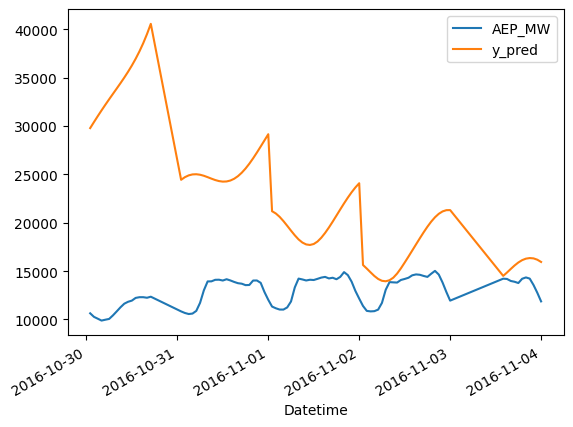

In [95]:
new.plot()